In [12]:
import pickle
import pandas as pd
import numpy as np
import math
# sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Import file

filename = "../reports/6096965eb2971b2ae52ba5e6ef160e85_ds.csv"
df = pd.read_csv(filename)
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df.shape
df.dtypes

Close                    float64
High                     float64
Low                      float64
Open                     float64
Volume                     int64
MA_short                 float64
MA_Slope_short           float64
MA_middle                float64
MA_Slope_middle          float64
MA_long                  float64
MA_Slope_long            float64
DI+                      float64
DI-                      float64
ADX                      float64
OBV                        int64
LT_MA                    float64
Prev_Close               float64
long_term_Cross            int64
Cross_Short              float64
Cross_Long               float64
sma_cross_Cross            int64
StdDev                   float64
bollinger_bands_Cross      int64
EMA_long                 float64
macd_Cross                 int64
RSI                      float64
rsi_Cross                  int64
Close_Future             float64
dtype: object

In [3]:
df.head(3)

,Close,High,Low,Open,Volume,MA_short,MA_Slope_short,MA_middle,MA_Slope_middle,MA_long,...,Cross_Short,Cross_Long,sma_cross_Cross,StdDev,bollinger_bands_Cross,EMA_long,macd_Cross,RSI,rsi_Cross,Close_Future
0,148.226715,149.385276,147.127565,148.711915,685200,148.541599,0.331726,145.169881,0.104469,141.271783,...,148.541599,145.169881,0,3.083773,0,145.629913,0,58.532073,0,153.286758
1,7.940763,8.047677,7.814411,8.037958,3263800,8.770801,-0.362534,9.730594,-0.102540,9.891580,...,8.770801,9.730594,0,0.763084,0,9.484401,0,28.703882,1,8.533648
2,11.608784,11.618579,11.452040,11.452040,136200,11.405017,0.030369,11.215946,0.024001,11.002552,...,11.405017,11.215946,0,0.230973,0,11.262377,1,61.025492,0,11.247273


In [4]:
# Convert Cross Signals into categories
columns_to_convert = [col for col in df.columns if col.endswith('_Cross')]

# Convert these columns to category type
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [5]:
df.dtypes

Close                     float64
High                      float64
Low                       float64
Open                      float64
Volume                      int64
MA_short                  float64
MA_Slope_short            float64
MA_middle                 float64
MA_Slope_middle           float64
MA_long                   float64
MA_Slope_long             float64
DI+                       float64
DI-                       float64
ADX                       float64
OBV                         int64
LT_MA                     float64
Prev_Close                float64
long_term_Cross          category
Cross_Short               float64
Cross_Long                float64
sma_cross_Cross          category
StdDev                    float64
bollinger_bands_Cross    category
EMA_long                  float64
macd_Cross               category
RSI                       float64
rsi_Cross                category
Close_Future              float64
dtype: object

In [6]:
y = df.Close_Future
X = df.loc[:, df.columns != 'Close_Future']

In [7]:
X.head(3)

,Close,High,Low,Open,Volume,MA_short,MA_Slope_short,MA_middle,MA_Slope_middle,MA_long,...,long_term_Cross,Cross_Short,Cross_Long,sma_cross_Cross,StdDev,bollinger_bands_Cross,EMA_long,macd_Cross,RSI,rsi_Cross
0,148.226715,149.385276,147.127565,148.711915,685200,148.541599,0.331726,145.169881,0.104469,141.271783,...,0,148.541599,145.169881,0,3.083773,0,145.629913,0,58.532073,0
1,7.940763,8.047677,7.814411,8.037958,3263800,8.770801,-0.362534,9.730594,-0.102540,9.891580,...,0,8.770801,9.730594,0,0.763084,0,9.484401,0,28.703882,1
2,11.608784,11.618579,11.452040,11.452040,136200,11.405017,0.030369,11.215946,0.024001,11.002552,...,0,11.405017,11.215946,0,0.230973,0,11.262377,1,61.025492,0


In [8]:
# Split data in train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalize X_Train data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)


In [10]:
# Model training
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf = rf_regressor.fit(X_train_scaled, y_train)
print(f"OOB Score: {rf.oob_score_}")

OOB Score: 0.9963861837137615


In [14]:
# Metrics
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAPE: {mape}%")

MAE: 6.314674986356106
MSE: 131.97376288279528
RMSE: 11.487983412365953
R²: 0.9963907188701553
MAPE: 0.05193701435119664%


Feature importances:
Close                    0.403691
Low                      0.315758
High                     0.046005
MA_long                  0.034807
Open                     0.033195
EMA_long                 0.032609
LT_MA                    0.028922
MA_short                 0.028641
Prev_Close               0.023460
Cross_Long               0.021265
MA_middle                0.019121
Cross_Short              0.006007
OBV                      0.001687
MA_Slope_long            0.000899
Volume                   0.000709
ADX                      0.000631
StdDev                   0.000627
MA_Slope_middle          0.000551
DI-                      0.000410
DI+                      0.000371
RSI                      0.000307
MA_Slope_short           0.000271
macd_Cross               0.000015
long_term_Cross          0.000012
sma_cross_Cross          0.000010
bollinger_bands_Cross    0.000010
rsi_Cross                0.000008
dtype: float64


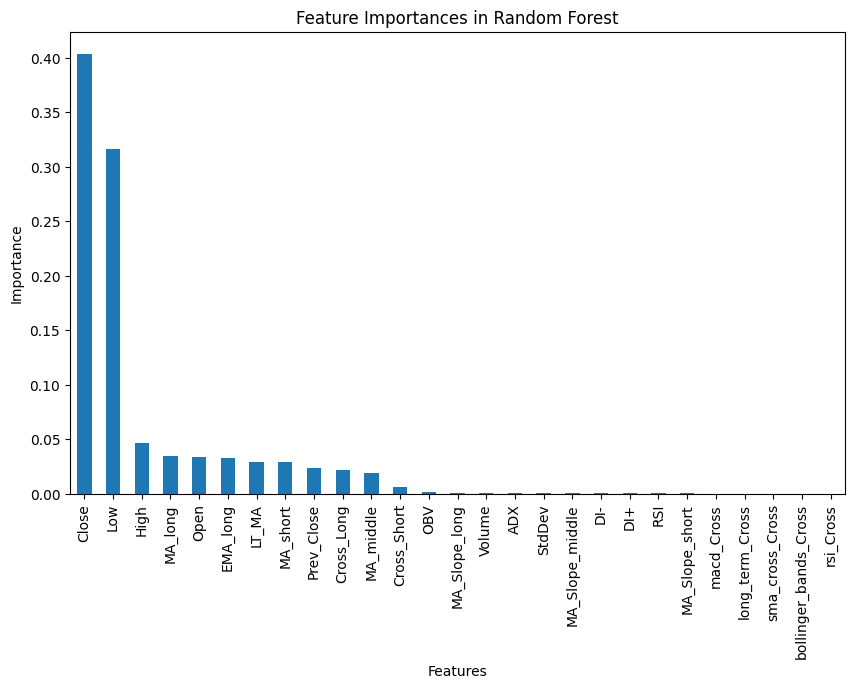

In [15]:
importances = rf_regressor.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, index=X.columns)

# Sort importances
f_importances_sorted = f_importances.sort_values(ascending=False)

# Print the feature ranking
print("Feature importances:")
print(f_importances_sorted)

# Optional: Visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
f_importances_sorted.plot(kind='bar')
plt.title("Feature Importances in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [16]:
# Save model
import joblib
joblib_file = "random_forest_regressor_model_jan_22_to_dez_24.pkl"
joblib.dump(rf_regressor, joblib_file)


['random_forest_regressor_model_jan_22_to_dez_24.pkl']

In [ ]:
# Assess model over new data
new_data = "../reports/b6350588b59564d6a883e41f59daf8ce_ds.csv"
new_df = pd.read_csv(new_data)
# Shuffle Data
new_df = new_df.sample(frac=1).reset_index(drop=True)

y_new = new_df.Close_Future
X_new = new_df.loc[:, new_df.columns != 'Close_Future']
X_new_scaled = scaler.transform(X_new)
y_pred_new = rf_regressor.predict(X_new_scaled)

In [ ]:
# Metrics

# Calculate metrics
mae = mean_absolute_error(y_new, y_pred_new)
mse = mean_squared_error(y_new, y_pred_new)
rmse = np.sqrt(mse)
r2 = r2_score(y_new, y_pred_new)
mape = mean_absolute_percentage_error(y_new, y_pred_new)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAPE: {mape}%")

for i in zip(X_new['Close'], y_new,y_pred_new):
    print(i)
